We will determine if a given image is of a cat or not. Images are obtained form [cifar-10](https://www.cs.toronto.edu/~kriz/cifar-10-python.tar.gz) dataset.

<img src="_ref/img.png" alt="Image description" style="width:20%;">


Let's say we have $m$ such images,
\begin{equation*}
\text{Training Set} :\{(x^{(1)},y^{(1)}), (x^{(2)},y^{(2)}), \cdots ,(x^{(m)},y^{(m)})\}
\end{equation*}

We separate the image and label in matrix form because it is computationally more efficient. So

$$
\begin{align}
  X &= \begin{bmatrix}
            \vdots & \vdots & \cdots & \vdots \\
            x^{(1)} & x^{(2)} & \cdots & x^{(m)} \\
            \vdots & \vdots & \cdots & \vdots
        \end{bmatrix}_{n_x \times m} \nonumber \\
  Y &= \begin{bmatrix}
            y^{(1)} & y^{(2)} & \cdots & y^{(m)}
        \end{bmatrix}_{1 \times m} \nonumber \\
  X &\in \mathbb{R}^{n_x \times m}, \quad Y \in \mathbb{R}^{1 \times m}
\end{align}
$$


In [1]:
import pickle
import matplotlib.pyplot as plt
import torch
import numpy as np
from torchmetrics import ConfusionMatrix
torch.manual_seed(0)

labels: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
 m: 10000
nx: 3072
shape of X: torch.Size([3072, 10000])
shape of Y: torch.Size([1, 10000])
Random No: 6044


(np.float64(-0.5), np.float64(31.5), np.float64(31.5), np.float64(-0.5))

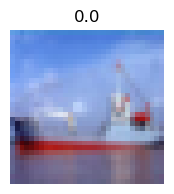

In [2]:

def unpickle(file):
    with open(file, 'rb') as fo:
        data = pickle.load(fo, encoding='bytes')
    return data
dataDict = unpickle("../raw/cifar-10-batches-py/data_batch_1")

# print(dataDict.keys())
X=torch.tensor(dataDict[b'data']).T
X=X.to(dtype=torch.float32)/255  # better to convert the range to 0 to 1 instead of 0 to 255 
X = 2*X-1
labels=torch.tensor(dataDict[b'labels']).view(1,-1)
Y = (labels==3).to(dtype=torch.float) ## 0 if image is not cat 1 if it is cat
# labels=
m=len(Y[0])  # We will use all these images so this is m training test case
nx = len(X)

print(f"labels:",list(set(dataDict[b'labels'])))
print(f" m: {m}")
print(f"nx: {nx}")
print(f"shape of X: {X.shape}")
print(f"shape of Y: {Y.shape}")

fig,ax=plt.subplots()
fig.set_size_inches(2,2)
randomImageNum = torch.randint(0,m,(1,)).item()
print(f"Random No: {randomImageNum}")
ax.imshow((X[:,randomImageNum].view(-1,1024).T.view(32,32,3)+1)/2)
ax.set_title(f"{Y[0,randomImageNum]}")
ax.axis("off")

So for a given image we want to calculate probability that it is of a cat. Mathematically we can write
\begin{equation}
\text{given}\quad x\in\mathbb{R}^{{n_x}\times 1}, \text{want}\quad \hat{y}=P(y=1|x), \quad 0 \leq \hat{y} \leq 1
\end{equation}


\begin{equation}
z=w^T\cdot x+b \quad|w\in\mathbb{R}^{n_x},  b \in \mathbb{R}
\end{equation}
In fancy term these $w$ is called \textit{weights} and $b$ is called \textit{bias}.
Also we want z to be in the [0,1] range so we add activation function 
\begin{equation} 
a=\hat{y}=\sigma(z) = \frac{1}{1+e^{-z}}
\end{equation}

Loss/Error Functoin

\begin{equation} 
L(\hat{y},y)= - (y\log{ (\hat{y})  }+(1-y)\log{(1-\hat{y})})
\end{equation}


Cost Function

So our task is to find $w,b$ which minimizes cost $J(w,b)$.
\begin{equation}
J(w,b)=\frac{1}{m}\sum_{i=1}^{m}{L(\hat{y}^{(i)},y^{(i)})}
\end{equation}


In [3]:
def loss(y,A):
    # return (y*y_hat)**2
    return -(y*torch.log(A)+(1-y)*torch.log(1-A))

In [4]:
def activation(z):
    return 1/(1+torch.exp(-z))
    # return torch.tanh(z)
    # return torch.relu(z)

In [5]:
def accuracy(y,A):
    A_= (A>0.9).to(dtype=torch.float)
    A_= torch.abs(y-A_)<1e-4
    return A_.sum()/A_.numel()

In [6]:
print(f" m: {m}")
print(f"nx: {nx}")
print(f"shape of X: {X.shape}")
print(f"shape of Y: {Y.shape}")

## initialize weights and bias matrx

# w = torch.rand(nx,1,requires_grad=True)*0.01 # DO NOT EVER DO THIS
w=torch.tensor(torch.rand(nx,1)*0.01,requires_grad=True)
b = torch.tensor(torch.rand(1),requires_grad=True)
z = w.T @ X + b
A = activation(z)
L = loss(Y,A)
J = torch.sum(L)/m
print(f"shape of Z: {z.shape}")
print(f"shape of A: {A.shape}")
print(f"shape of L: {L.shape}")
print(f"shape of J: {J.shape}")
print(f"value of J: {J}")

print(f"value of z: {z[0,0:20]}")
print(f"value of A: {A[0,0:20]}")
print(f"value of Y: {Y[0,0:20]}")

 m: 10000
nx: 3072
shape of X: torch.Size([3072, 10000])
shape of Y: torch.Size([1, 10000])
shape of Z: torch.Size([1, 10000])
shape of A: torch.Size([1, 10000])
shape of L: torch.Size([1, 10000])
shape of J: torch.Size([])
value of J: 1.7625203132629395
value of z: tensor([-2.0119,  1.1864,  1.5722, -4.7944, -2.1123, -3.6311, -0.0662,  0.2167,
         3.6946, -5.8888, -5.5305,  2.5801,  1.4581, -5.2086, -3.1885,  2.4981,
         2.3088, -3.7344,  0.8785, -0.1498], grad_fn=<SliceBackward0>)
value of A: tensor([0.1180, 0.7661, 0.8281, 0.0082, 0.1079, 0.0258, 0.4835, 0.5540, 0.9757,
        0.0028, 0.0039, 0.9296, 0.8112, 0.0054, 0.0396, 0.9240, 0.9096, 0.0233,
        0.7065, 0.4626], grad_fn=<SliceBackward0>)
value of Y: tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 1.,
        0., 0.])


C:\Users\jangi\AppData\Local\Temp\ipykernel_18916\274238781.py:9: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  w=torch.tensor(torch.rand(nx,1)*0.01,requires_grad=True)
C:\Users\jangi\AppData\Local\Temp\ipykernel_18916\274238781.py:10: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  b = torch.tensor(torch.rand(1),requires_grad=True)


|                  | **Actual Positive** | **Actual Negative** |
|------------------|---------------------|---------------------|
| **Predicted Positive** | True Positive (TP)     | False Positive (FP)    |
| **Predicted Negative** | False Negative (FN)    | True Negative (TN)     |


In [8]:
alpha=0.001
confmat = ConfusionMatrix(task="binary",num_classes=2)
for i in range(10000):
    J.backward()
    with torch.no_grad():  # Disable gradient tracking during update
        w -= alpha * w.grad
        b -= alpha * b.grad
        w.grad.zero_()
        b.grad.zero_()
    z=w.T@X+b
    A = activation(z)
    L = loss(Y,A)
    J = torch.sum(L)/m
    if i%500 == 0:
        # print(A[0,0:20])
        # print(Y[0,0:20])
        # Compute confusion matrix
        cm = confmat(Y, (A>0.5).to(dtype=torch.float32))
        accuracy = (cm[0,0]+cm[1,1])/torch.sum(cm)
        print(f"Iteration: {i:<3d} Cost: {J:<6.2f} Accucary:{accuracy:.2f}")
        print(f"minA: {torch.min(A).item():0.2f}, maxA {torch.max(A).item():0.2f}")
        
        print(f"TN:{cm[0,0]:>4}, FP:{cm[0,1]:>4}")
        print(f"FN:{cm[1,0]:>4}, TP:{cm[1,1]:>4}\n")

Iteration: 0   Cost: 0.34   Accucary:0.88
minA: 0.00, maxA 1.00
TN:8660, FP: 867
FN: 324, TP: 149

Iteration: 500 Cost: 0.33   Accucary:0.88
minA: 0.00, maxA 1.00
TN:8687, FP: 875
FN: 297, TP: 141

Iteration: 1000 Cost: 0.33   Accucary:0.88
minA: 0.00, maxA 1.00
TN:8712, FP: 882
FN: 272, TP: 134

Iteration: 1500 Cost: 0.33   Accucary:0.89
minA: 0.00, maxA 1.00
TN:8734, FP: 887
FN: 250, TP: 129

Iteration: 2000 Cost: 0.32   Accucary:0.89
minA: 0.00, maxA 1.00
TN:8760, FP: 894
FN: 224, TP: 122

Iteration: 2500 Cost: 0.32   Accucary:0.89
minA: 0.00, maxA 1.00
TN:8778, FP: 901
FN: 206, TP: 115

Iteration: 3000 Cost: 0.32   Accucary:0.89
minA: 0.00, maxA 1.00
TN:8795, FP: 905
FN: 189, TP: 111

Iteration: 3500 Cost: 0.31   Accucary:0.89
minA: 0.00, maxA 1.00
TN:8815, FP: 910
FN: 169, TP: 106

Iteration: 4000 Cost: 0.31   Accucary:0.89
minA: 0.00, maxA 1.00
TN:8827, FP: 916
FN: 157, TP: 100

Iteration: 4500 Cost: 0.31   Accucary:0.89
minA: 0.00, maxA 1.00
TN:8832, FP: 921
FN: 152, TP:  95

It